# Cuvier's beaked whale click

For applying a matched filter to Cuvier's beaked whale (Zc) clicks, a synthetic beaked whale click could be constructed according to

\begin{equation}
    s(t)=A(t)\exp \{-2\pi i (f_0+f_m t)t\}
\end{equation}

where A(t) the signal amplitude is modeled according to

\begin{equation}
  A(t)=(A_0 t)^\beta \exp \{- (A_0 t)^\gamma\}
\end{equation}

and where f0 = 30 kHz, fm = 60 kHz/ms, A0 = 13kHz, $\beta=1.5$, and  $\gamma=1.5$ and t denotes the time vector.

The formula and parameters for the replica generation were chosen to fit an on-axis Cuvier's beaked whale click.

The following script visualizes a nominal Zc click for suffucient high sampling frequency (say 192 kHz), so that the signal may be simulated directly.

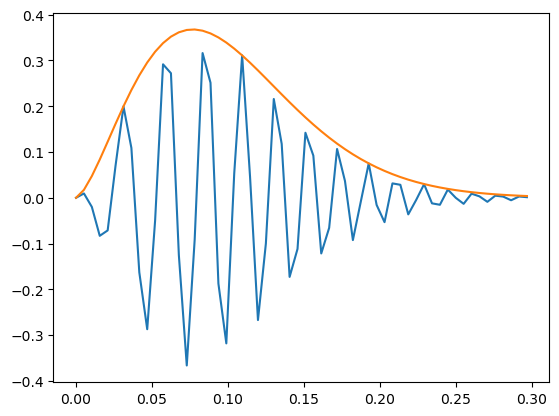

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def zcSig(tt,f0,fm,aa,bb,cc):
    return (aa*tt)**bb * np.exp(-(aa*tt)**cc + 2*np.pi*1j*(f0+fm*tt)*tt)

fs=192 #kHz
ts=0.3 #ms
tt=np.arange(0,ts,1/fs)

f0=30
fm=60
aa=13
bb=1.5
cc=1.5
ss=zcSig(tt,f0,fm,aa,bb,cc)

plt.plot(tt,np.real(ss));
plt.plot(tt,np.abs(ss));


## reduced sampling rate
In case the sampling rate is less than the required bandwidth (say 96 kHz) the zc signal must also be downsampled (done properly with anti-aliasing filer)

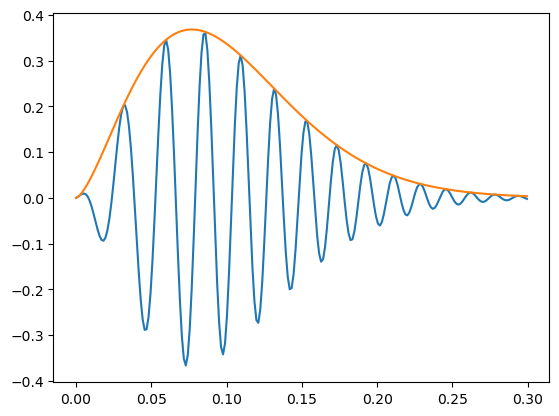

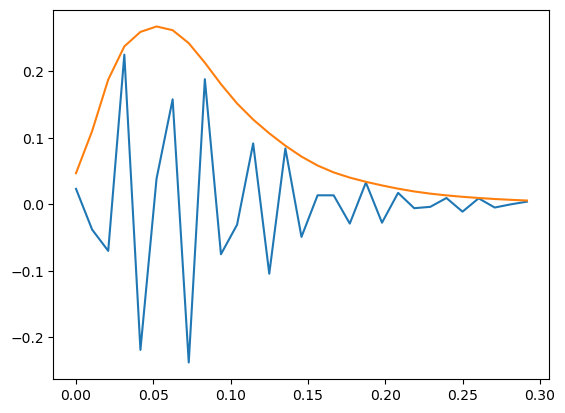

In [26]:
import scipy.signal as signal

fs=768 #kHz
ts=0.3 #ms
tt=np.arange(0,ts,1/fs)

f0=30
fm=60
aa=13
bb=1.5
cc=1.5
xx=zcSig(tt,f0,fm,aa,bb,cc)
tx=np.arange(len(xx))/fs
plt.plot(tx,np.real(xx));
plt.plot(tx,np.abs(xx));
plt.show()

zz=signal.decimate(xx,8)
tz=np.arange(len(zz))*8/fs
plt.plot(tz,np.real(zz));
plt.plot(tz,np.abs(zz));
plt.show()

## delayed signal generation

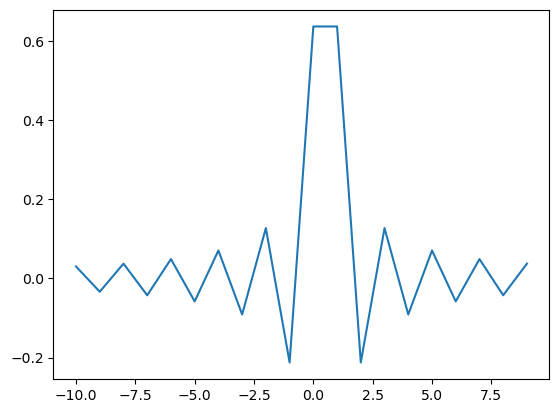

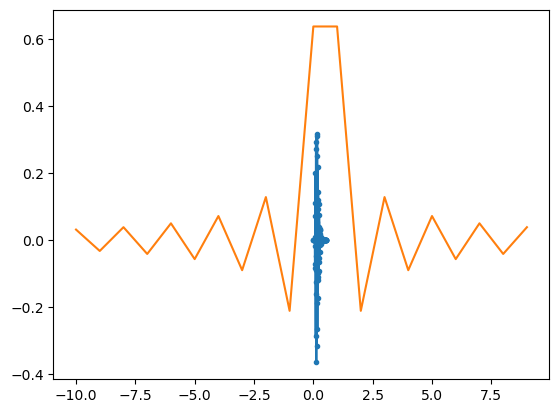

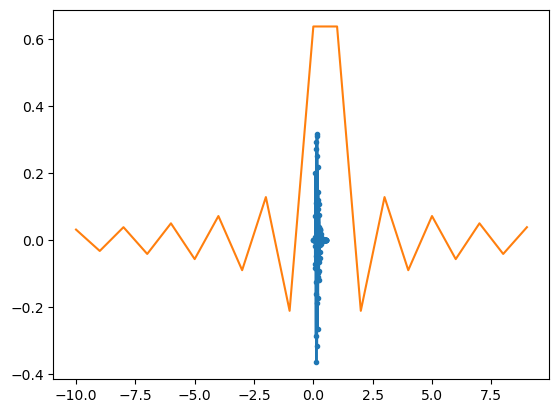

(0.0, 0.35)

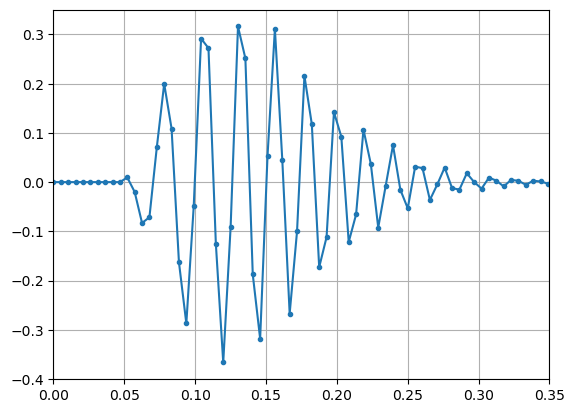

In [27]:
import scipy.signal as signal

fs=192 #kHz
ts=0.5 #ms
tt=np.arange(0,ts,1/fs)

f0=30
fm=60
aa=13
bb=1.5
cc=1.5
ss=zcSig(tt,f0,fm,aa,bb,cc)

#see also http://www.labbookpages.co.uk/audio/beamforming/fractionalDelay.html#filter
def delay(xx,N,tau):
    #tau = -4.5 # Fractional delay [samples].
    n = np.arange(-N,+N)
    # Compute sinc filter.
    h = np.sinc(n - tau)
    
    # Multiply sinc filter by window
    h *= np.blackman(2*N)
    
    # Normalize to get unity gain.
    h /= np.sum(h)

    uu=np.concatenate((xx,np.zeros(N,)))

    yy=signal.lfilter(h,1,uu); yy=yy[N:,]
    return yy

uu=np.concatenate((np.zeros(10,),np.real(ss)))
tu=np.arange(len(uu))/fs

N=10
dt=1
x0=delay(uu,N,0)
plt.plot(tu,x0,'.-')

x1=delay(uu,N,+dt)
plt.plot(tu,x1,'.-')

x2=delay(uu,N,-dt)
plt.plot(tu,x2,'.-')
plt.grid(True)
plt.xlim(0,0.35)
